##### Imports

In [1]:
from astropy.io import fits
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [ ]:
from simple_veloce_reduction import veloce_config, veloce_extraction, veloce_reduction_tools

##### Load/create config

Set up info about run and target(s)

In [ ]:
data_dirs = {'red': 'ccd_3', 'green': 'ccd_2', 'blue': 'ccd_1'}

In [4]:
config, veloce_paths = veloce_config.load_config('config.yaml')
science_targets = config['science_targets']

In [5]:
config = {
    # primary information for the reduction
    'reduce': 'run',  # what to reduce options: 'run', 'night', or 'file'; run will reduce all dates in provided directories.
    'date': '230826',  # date of the observation (YYMMDD), if 'reduce' is 'night' or 'file'
    'filename': '26aug20146.fits',  # name of the file to reduce, if 'reduce' is 'file'
    'science_targets': 'Default',  # file containing a list of science targets, 'Default' will use all science frames in the night/run
    'calib_type': 'arcTh',  # Wavelength calibration to use SimLC, arcTh or Static (not recommended), other possibilities are not implemented: SimThXe, Interpolate_LC, Interpolate_Th

    # secondary information for the reduction
    'use_log': False,  # True or False, if True the code will use the log files to identify the files
    'arm': 'red',  # Which arm to reduce 'all', 'red', 'green' or 'blue'
    'amplifier_mode': 4,  # 2 or 4
    'validate_trace': True,  # True or False, if True the code will cross-correlate FibFlat with reference to determine offset of the trace(s)
    'sim_calib': True,  # Flag indicating if the simultaneous calibration was used True or False
    'plot_diagnostic': True,  # True or False
    'scattered_light': False,  # try to remove scattered light (background) True or False
    'flat_field': False,  # these are fiber flats (white light fiber spectrum) used for pixel sensitivity True or False

    # part responsible for the paths
    'input_dir': os.path.join("/home/usqobserver2/VeloceData/CSV_Run/"), # path to the directory with raw data (one in which the run directory is, i.e. input directory)
    'output_dir': os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data", "CSV_Run"), # path to the directory where extracted data will be stored (i.e. output directory)

    # below are paths where code will store intermediate files and diagnostics
    # by default they are set as subdirectories of output directory with extracted data
    # 'blaze_dir': 'Default',
    'master_dir': 'Default',  # directory for master images for night/run
    'wavelength_calibration_dir': 'Default',  # directory for wavelength calibration related files for the night/run
    'trace_shift_dir': 'Default',  # TODO: add to the code
    'plot_dir': 'Default',  # directory for diagnostic plots

    # below are paths where the code will look for internal files
    # leave as default unless you know what you are doing
    # 'veloce_reduction_dir': 'Default',
    'trace_dir': 'Default',  # path to the directory with traces to be extracted
    'trace_file': 'Default',  # filename of the file with traces to be extracted
    'wave_dir': 'Default',  # path to the directory with reference wavelength solution
}

veloce_paths = veloce_config.VelocePaths.from_config(config)
science_targets = veloce_config.load_target_list(config['science_targets'])

In [ ]:
#WASP189b - new wave solution
config = {
    # primary information for the reduction
    'reduce': "run", # 'night', 'run', 'file'
    'run': "WASP189b",
    'date': "240410", # date of the observation (YYMMDD), if reduce is 'night' or 'file'
    'filename': "", # name of the file to reduce, if reduce is 'file'
    'science_targets': "WASP-189b.dat", # file containg list of science targets
    'calib_type': "arcTh", # Wavelength calibration to use SimLC, arcTh, or Static

    # secondary information for the reduction
    'use_log': False,  # True or False, if True the code will use the log files to identify the files
    'arm': "all", # Which arm to reduce 'all', 'red', 'green' or 'blue'
    'amplifier_mode': 2, # 2 or 4
    'validate_trace': True,  # True or False, if True the code will cross-correlate FibFlat with reference to determine offset of the trace(s)
    'sim_calib': False, # Flag indicating if simultaneous calibrations are used True or False
    'plot_diagnostic': True, # True or False
    'scattered_light': False, # try to remove scattered light True or False
    'flat_field': True, # True or False

    # part responsible for the paths
    'input_dir': os.path.join("/home/usqobserver2/VeloceData/WASP189b/"), # path to the directory with raw data (one in which the run directory is, i.e. input directory)
    'output_dir': os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data", "WASP189b_test"), # path to the directory where extracted data will be stored (i.e. output directory)

    # below are paths where code will store intermediate files and diagnostics
    # by default they are set as subdirectories of output directory with extracted data
    # 'blaze_dir': 'Default',
    'master_dir': 'Default', # directory for master images for night/run
    'wavelength_calibration_dir': 'Default', # directory for wavelength calibration related files for the night/run
    'trace_shift_dir': 'Default', # directory for traces shifted to the position on the night (or first night f the run)
    'plot_dir': 'Default', # directory for diagnostic plots

    # below are paths where the code will look for internal files
    # leave as default unless you know what you are doing
    # 'veloce_reduction_dir': 'Default',
    'trace_dir': 'Default', # path to the directory with traces to be extracted
    'trace_file': 'Default', # filename of the file with traces to be extracted
    'wave_dir': 'Default', # path to the directory with reference wavelength solution
}

veloce_paths = veloce_config.VelocePaths.from_config(config)
# science_targets = veloce_config.load_target_list(config['science_targets'])
# science_targets = ['WASP-189b']
science_targets = [None]

In [5]:
#Delta Call 2025 accretion 
config = {
    # primary information for the reduction
    'reduce': "run", # 'night', 'run', 'file'
    'run': "Delta_Call_2025_accretion",
    'date': "", # date of the observation (YYMMDD), if reduce is 'night' or 'file'
    'filename': "", # name of the file to reduce, if reduce is 'file'
    'science_targets': "Default", # file containg list of science targets
    'calib_type': "arcTh", # Wavelength calibration to use SimLC, arcTh, or Static

    # secondary information for the reduction
    'use_log': False,  # True or False, if True the code will use the log files to identify the files
    'arm': "all", # Which arm to reduce 'all', 'red', 'green' or 'blue'
    'amplifier_mode': 2, # 2 or 4
    'validate_trace': True,  # True or False, if True the code will cross-correlate FibFlat with reference to determine offset of the trace(s)
    'sim_calib': True, # Flag indicating if simultaneous calibrations are used True or False
    'plot_diagnostic': True, # True or False
    'scattered_light': False, # try to remove scattered light True or False
    'flat_field': False, # True or False

    # part responsible for the paths
    'input_dir': os.path.join("/home/usqobserver2/VeloceData/Delta_Call_2025_accretion/"), # path to the directory with raw data (one in which the run directory is, i.e. input directory)
    'output_dir': os.path.join("/home/usqobserver2/Joachim_veloce/Extracted_data", "Delta_Call_2025_accretion"), # path to the directory where extracted data will be stored (i.e. output directory)

    # below are paths where code will store intermediate files and diagnostics
    # by default they are set as subdirectories of output directory with extracted data
    # 'blaze_dir': 'Default',
    'master_dir': 'Default', # directory for master images for night/run
    'wavelength_calibration_dir': 'Default', # directory for wavelength calibration related files for the night/run
    'trace_shift_dir': 'Default', # directory for traces shifted to the position on the night (or first night f the run)
    'plot_dir': 'Default', # directory for diagnostic plots

    # below are paths where the code will look for internal files
    # leave as default unless you know what you are doing
    # 'veloce_reduction_dir': 'Default',
    'trace_dir': 'Default', # path to the directory with traces to be extracted
    'trace_file': 'Default', # filename of the file with traces to be extracted
    'wave_dir': 'Default', # path to the directory with reference wavelength solution
}

veloce_paths = veloce_config.VelocePaths.from_config(config)
# science_targets = veloce_config.load_target_list(config['science_targets'])
science_targets = [None]

In [7]:
# run = "CSV_Run"
# veloce_paths = veloce_config.VelocePaths(run)
# veloce_paths.__post_init__()

# science_targets = ['HD20203-USQ01']

# arm = 'green'

# # Days and dates are redundant, should make one automatically generated from the other
# dates = ['230826'] # can be drawn from dirs present in the run directory
# days = ['26aug'] 

##### Read data filenames from logs and create target list

In [6]:
obs_list = veloce_config.load_run_logs(science_targets, veloce_paths, config)

Error reading /home/usqobserver2/VeloceData/Delta_Call_2025_accretion/250404/ccd_1/drt_temp0194.fits: Empty or corrupt FITS file


In [7]:
target_list = veloce_config.get_obs_list(obs_list['science'])
#  obs_list_name = veloce_config.save_science_target_list(obs_list['science'], run=config['run'])
# can be done also by target
# and with custom filename for resulting file

##### Extract science data


In [8]:
# output_path = veloce_paths.extracted_parent_dir
veloce_extraction.extract_run(target_list, config, veloce_paths, obs_list)

red
[Info]: Adjusting traces by 3.0 pixels.
Building new wavelength solution based on arc Th lines for red arm on 250404
Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko} and
    J.~Reader and {and NIST ASD Team}},
    HOWPUBLISHED = {{NIST Atomic Spectra Database
    (ver. 5.12), [Online]. Available:
    {	t{https://physics.nist.gov/asd}} [2025, July 22].
    National Institute of Standards and Technology,
    Gaithersburg, MD.}},
    year = {2024},
    }

[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC peak fitting failed: `x0` is infeasible.
[Warning] LC pea

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.410 to 0.032 after 25 iterations.
37795 04apr30057.fits
HD40765 04apr30063.fits
HD40765 04apr30064.fits
HD40765 04apr30065.fits
HD40765 04apr30066.fits
HD40765 04apr30067.fits
HD100889 04apr30082.fits
HD100889 04apr30083.fits
HD100889 04apr30084.fits
HD77717 04apr30095.fits
HD77717 04apr30096.fits
HD77717 04apr30097.fits
HD77717 04apr30098.fits
HD77717 04apr30099.fits
98718 04apr30107.fits
HD95811 04apr30110.fits
HD95811 04apr30111.fits
HD95811 04apr30112.fits
HD95811 04apr30116.fits
160578 04apr30125.fits
HD161022 04apr30130.fits
HD161022 04apr30131.fits
HD161022 04apr30132.fits
HD161022 04apr30133.fits
HD161022 04apr30134.fits
175191 04apr30137.fits
SimLCSkyArc 04apr30152.fits
Building new wavelength solution based on arc Th lines for red arm on 250405
Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.380 to 0.028 after 23 iterations.
50013 05apr30067.fits
HD40765 05apr30075.fits
HD40765 05apr30076.fits
HD40765 05apr30077.fits
HD40765 05apr30078.fits
HD40765 05apr30079.fits
HD77717 05apr30087.fits
HD77717 05apr30088.fits
HD77717 05apr30089.fits
HD77717 05apr30090.fits
HD77717 05apr30091.fits
HD100889 05apr30100.fits
HD100889 05apr30101.fits
HD100889 05apr30102.fits
HD95811 05apr30109.fits
HD95811 05apr30110.fits
HD95811 05apr30111.fits
HD95811 05apr30112.fits
HD95811 05apr30113.fits
HD100889 05apr30119.fits
HD100889 05apr30120.fits
HD100889 05apr30121.fits
HD114330 05apr30125.fits
HD114330 05apr30126.fits
HD114330 05apr30127.fits
175191 05apr30136.fits
HD161022 05apr30140.fits
HD161022 05apr30141.fits
HD161022 05apr30142.fits
HD161022 05apr30143.fits
HD161022 05apr30144.fits
HD161022 05apr30145.fits
143275 05apr30149.fits
Building new wavelength solution based on arc Th lines for red arm on 250406
Loaded line list
 Notes: 350nm-950nm air, w

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.441 to 0.047 after 24 iterations.


/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


56139 06apr30051.fits
backup1 06apr30055.fits
backup1 06apr30056.fits
backup1 06apr30057.fits
backup1 06apr30058.fits
HD100889 06apr30067.fits
HD100889 06apr30068.fits
HD100889 06apr30069.fits
HD60753 06apr30085.fits
85512 06apr30088.fits
105435 06apr30094.fits
backup2 06apr30098.fits
backup2 06apr30099.fits
backup2 06apr30100.fits
backup2 06apr30101.fits
A0_standard 06apr30110.fits
A0_standard 06apr30111.fits
A0_standard 06apr30112.fits
backup3 06apr30118.fits
backup3 06apr30119.fits
backup3 06apr30120.fits
backup3 06apr30121.fits
169022 06apr30126.fits
green
[Info]: Adjusting traces by -2.0 pixels.
Building new wavelength solution based on arc Th lines for green arm on 250404
Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko} and
    J.~Reader and {and NIST ASD Team}},
    HOWPUBLISHED = {{NIST Atomic Spectra Database
    (ver. 5.12), [Online]

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.285 to 0.042 after 15 iterations.
37795 04apr20057.fits
HD40765 04apr20063.fits
HD40765 04apr20064.fits
HD40765 04apr20065.fits
HD40765 04apr20066.fits
HD40765 04apr20067.fits
HD100889 04apr20082.fits
HD100889 04apr20083.fits
HD100889 04apr20084.fits
HD77717 04apr20095.fits
HD77717 04apr20096.fits
HD77717 04apr20097.fits
HD77717 04apr20098.fits
HD77717 04apr20099.fits
98718 04apr20107.fits
HD95811 04apr20110.fits
HD95811 04apr20111.fits
HD95811 04apr20112.fits
HD95811 04apr20116.fits
160578 04apr20125.fits
HD161022 04apr20130.fits
HD161022 04apr20131.fits
HD161022 04apr20132.fits
HD161022 04apr20133.fits
HD161022 04apr20134.fits
175191 04apr20137.fits
SimLCSkyArc 04apr20152.fits
Building new wavelength solution based on arc Th lines for green arm on 250405
Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchen

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Std of residuals dropped from 0.195 to 0.020 after 999 iterations.
[Warning]: Wavelength solution fitting did not converge.
50013 05apr20067.fits
HD40765 05apr20075.fits
HD40765 05apr20076.fits
HD40765 05apr20077.fits
HD40765 05apr20078.fits
HD40765 05apr20079.fits
HD77717 05apr20087.fits
HD77717 05apr20088.fits
HD77717 05apr20089.fits
HD77717 05apr20090.fits
HD77717 05apr20091.fits
HD100889 05apr20100.fits
HD100889 05apr20101.fits
HD100889 05apr20102.fits
HD95811 05apr20109.fits
HD95811 05apr20110.fits
HD95811 05apr20111.fits
HD95811 05apr20112.fits
HD95811 05apr20113.fits
HD100889 05apr20119.fits
HD100889 05apr20120.fits
HD100889 05apr20121.fits
HD114330 05apr20125.fits
HD114330 05apr20126.fits
HD114330 05apr20127.fits
175191 05apr20136.fits
HD161022 05apr20140.fits
HD161022 05apr20141.fits
HD161022 05apr20142.fits
HD161022 05apr20143.fits
HD161022 05apr20144.fits
HD161022 05apr20145.fits
143275 05apr20149.fits
Building new wavelength solution based on arc Th lines for green arm on 2

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.219 to 0.026 after 19 iterations.
56139 06apr20051.fits
backup1 06apr20055.fits
backup1 06apr20056.fits
backup1 06apr20057.fits
backup1 06apr20058.fits
HD100889 06apr20067.fits
HD100889 06apr20068.fits
HD100889 06apr20069.fits
HD60753 06apr20085.fits
85512 06apr20088.fits
105435 06apr20094.fits
backup2 06apr20098.fits
backup2 06apr20099.fits
backup2 06apr20100.fits
backup2 06apr20101.fits
A0_standard 06apr20110.fits
A0_standard 06apr20111.fits
A0_standard 06apr20112.fits
backup3 06apr20118.fits
backup3 06apr20119.fits
backup3 06apr20120.fits
backup3 06apr20121.fits
169022 06apr20126.fits
blue
[Info]: Adjusting traces by 1.0 pixels.
Building new wavelength solution based on arc Th lines for blue arm on 250404
Loaded line list
 Notes: 350nm-950nm air, with uncertainties, only without intensity flags, relative intensity above 50 
 Cite as: 
 @Misc{NIST_ASD,
    author = {A.~Kramida and {Yu.~Ralchenko} and
    J.~Reader and {and NIST ASD Team}},
 

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[Warning]: not enough points in order 157.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 167.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 157.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 167.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 157.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 167.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 157.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 167.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enough points in order 157.0 for 6 degree polynomial, this order might be poorly conditioned.
[Warning]: not enou

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.207 to 0.021 after 18 iterations.
50013 05apr10067.fits
HD40765 05apr10075.fits
HD40765 05apr10076.fits
HD40765 05apr10077.fits
HD40765 05apr10078.fits
HD40765 05apr10079.fits
HD77717 05apr10087.fits
HD77717 05apr10088.fits
HD77717 05apr10089.fits
HD77717 05apr10090.fits
HD77717 05apr10091.fits
HD100889 05apr10100.fits
HD100889 05apr10101.fits
HD100889 05apr10102.fits
HD95811 05apr10109.fits
HD95811 05apr10110.fits
HD95811 05apr10111.fits
HD95811 05apr10112.fits
HD95811 05apr10113.fits
HD100889 05apr10119.fits
HD100889 05apr10120.fits
HD100889 05apr10121.fits
HD114330 05apr10125.fits
HD114330 05apr10126.fits
HD114330 05apr10127.fits
175191 05apr10136.fits
HD161022 05apr10140.fits
HD161022 05apr10141.fits
HD161022 05apr10142.fits
HD161022 05apr10143.fits
HD161022 05apr10144.fits
HD161022 05apr10145.fits
143275 05apr10149.fits
Building new wavelength solution based on arc Th lines for blue arm on 250406
Loaded line list
 Notes: 350nm-950nm air, 

/home/usqobserver2/anaconda3/envs/reduce_spectro/lib/python3.12/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Converged.
Std of residuals dropped from 0.174 to 0.017 after 16 iterations.
56139 06apr10051.fits
backup1 06apr10055.fits
backup1 06apr10056.fits
backup1 06apr10057.fits
backup1 06apr10058.fits
HD100889 06apr10067.fits
HD100889 06apr10068.fits
HD100889 06apr10069.fits
HD60753 06apr10085.fits
85512 06apr10088.fits
105435 06apr10094.fits
backup2 06apr10098.fits
backup2 06apr10099.fits
backup2 06apr10100.fits
backup2 06apr10101.fits
A0_standard 06apr10110.fits
A0_standard 06apr10111.fits
A0_standard 06apr10112.fits
backup3 06apr10118.fits
backup3 06apr10119.fits
backup3 06apr10120.fits
backup3 06apr10121.fits
169022 06apr10126.fits


In [15]:
# veloce_extraction.extract_single_file(config['filename'], config, veloce_paths, obs_list)

##### Plot some extracted spectra

In [10]:
# filename = 'WASP-189b_veloce_blue_10apr10105.fits'
# filename = 'WASP-189b_veloce_green_10apr20105.fits'
# filename = 'WASP-189b_veloce_red_10apr30105.fits'
filename = [file for file in os.listdir(veloce_paths.output_dir) if '.fits' in file][0]
wave, flux, hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, filename))

In [ ]:
# for filename in os.listdir(veloce_paths.output_dir):
#     if filename[-5:] == '.fits':
#         wave, _, hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, filename))
#         _, flux, _ = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(old_extraction_dir, filename))
#         for w, f in zip(wave, flux):
#             if len(w) != len(f):
#                 print("error")
#         fits_filename = os.path.join(veloce_paths.output_dir, filename)
#         veloce_reduction_tools.save_extracted_spectrum_fits(
#                                 filename=fits_filename, wave=wave, flux=flux, hdr=hdr)    

In [11]:
from scipy.ndimage import median_filter

In [12]:
%matplotlib widget

Text(0, 0.5, 'Flux [ADU]')

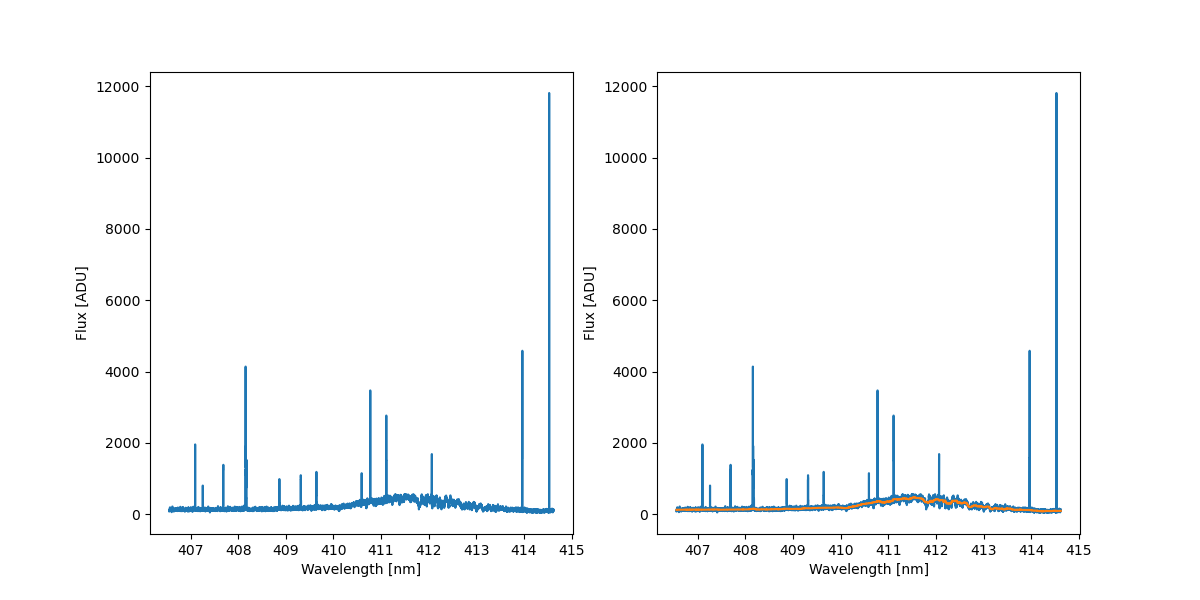

In [13]:
order = 10
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].step(wave[order], flux[order], where='mid')
ax[0].set_xlabel('Wavelength [nm]')
ax[0].set_ylabel('Flux [ADU]')
ax[1].step(wave[order], flux[order], where='mid')
ax[1].step(wave[order], median_filter(flux[order], 51), where='mid')
mask = flux[order] - median_filter(flux[order], 51) < median_filter(flux[order], 51) + 1.5*np.std(flux[order] - median_filter(flux[order], 51))
ax[1].step(wave[order][mask], flux[order][mask], where='mid')

# plt.xlim(588.89, 590.09)
# plt.ylim(1000, 10000)
ax[1].set_xlabel('Wavelength [nm]')
ax[1].set_ylabel('Flux [ADU]')

In [14]:
flux_order = flux[order][~np.isnan(flux[order])]
mask = flux_order - median_filter(flux_order, 51) < median_filter(flux_order, 51) + 1.5*np.std(flux_order - median_filter(flux_order, 51))
print(np.std(flux_order[mask]-median_filter(flux_order[mask], 51)))

48.76191669758154


In [18]:
blue_filename = 'WASP-189b_veloce_blue_10apr10105.fits'
green_filename = 'WASP-189b_veloce_green_10apr20105.fits'
red_filename = 'WASP-189b_veloce_red_10apr30105.fits'
# filename = os.listdir(veloce_paths.output_dir)[0]
blue_wave, blue_flux, blue_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, blue_filename))
green_wave, green_flux, green_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, green_filename))
red_wave, red_flux, red_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, red_filename))


In [15]:
blue_filename = '37795_veloce_blue_04apr10057.fits'
green_filename = '37795_veloce_green_04apr20057.fits'
red_filename = '37795_veloce_red_04apr30057.fits'
# filename = os.listdir(veloce_paths.output_dir)[0]
blue_wave, blue_flux, blue_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, blue_filename))
green_wave, green_flux, green_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, green_filename))
red_wave, red_flux, red_hdr = veloce_reduction_tools.load_extracted_spectrum_fits(os.path.join(veloce_paths.output_dir, red_filename))

In [16]:
%matplotlib widget

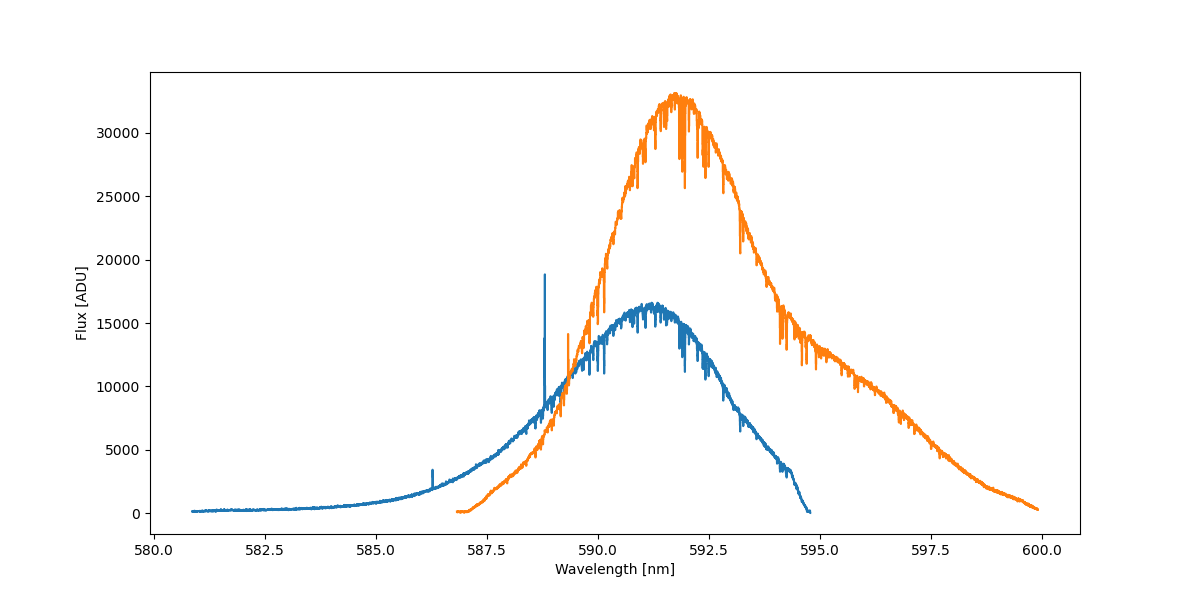

In [17]:
plt.close('all')
red_order = -1
green_order = 0
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.step(red_wave[red_order], red_flux[red_order], where='mid')
ax.step(green_wave[green_order], green_flux[green_order], where='mid')
ax.set_xlabel('Wavelength [nm]')
ax.set_ylabel('Flux [ADU]')
plt.show()

##### Make master flats (based on file list)

In [18]:
arms = data_dirs.keys() if config['arm'] == 'all' else [config['arm']]

for arm in arms:
    master_type = f'flat_{arm}'
    for date in obs_list[master_type].keys():
        if obs_list[master_type][date] != []:
            master_flat, norm_flat = veloce_extraction.get_flat(veloce_paths, arm, config['amplifier_mode'], date, obs_list)
        # master_flat, hdr = veloce_reduction_tools.get_master_mmap(obs_list,
        #                     master_type, veloce_paths.input_dir, run, date, arm)
        # master_flat_filename =  f'master_{master_type}_{date}.fits'
        # veloce_reduction_tools.save_image_fits(master_flat_filename, veloce_paths.master_dir, master_flat, hdr)

In [24]:
arm = "green"
amplifier_mode = config['amplifier_mode']
run = config['run']
master_type = f'flat_{arm}'
date = list(obs_list[master_type].keys())[0]
master_flat_filename =  f'master_{master_type}_{date}.fits'

In [26]:
with fits.open(os.path.join(veloce_paths.master_dir, master_flat_filename)) as hdul:
    master_flat = hdul[0].data
    hdr = hdul[0].header

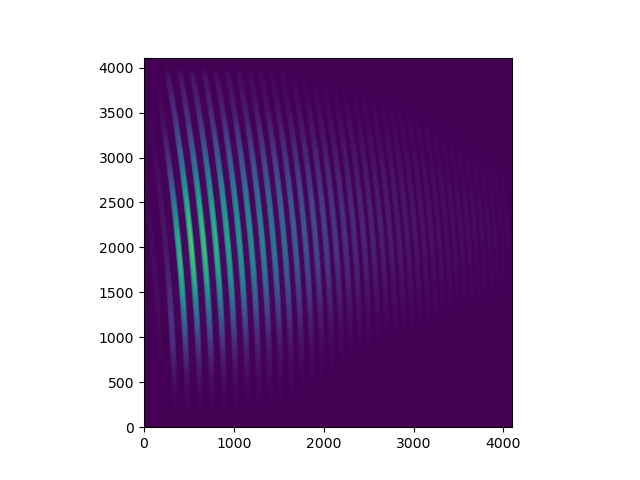

In [28]:
plt.close('all')
plt.imshow(master_flat, origin='lower')
plt.show()

In [63]:
plt.close('all')

In [ ]:
### TODO: normalise spectra using flats...

In [ ]:
filename = os.path.join(veloce_paths.trace_shift_dir, f'trace_{arm}_{date}.pkl')
traces = veloce_reduction_tools.Traces.load_traces(filename)

In [ ]:
extracted_master, extracted_master_img = veloce_reduction_tools.extract_orders_with_trace(master_flat, traces)